In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

# Problem 1

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])
iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Split the data between test and train with 20% of the test size
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.2)

In [5]:
# Calculate Precision, Recall and F1 Score
max_depth_range = list(range(1, 6))
print("\n")
for depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth = depth)
    clf.fit(X_train, Y_train)
    expected = Y_test
    predicted = clf.predict(X_test)
    print("******************************** Max depth = {} ********************************".format(depth))
    print("\n")
    print("Precision, Recall and F1 Score with macro = {}".format(metrics.precision_recall_fscore_support(expected,predicted,average='macro')))
    print("Precision, Recall and F1 Score with micro = {}".format(metrics.precision_recall_fscore_support(expected,predicted,average='micro')))
    print("Precision, Recall and F1 Score with weighted = {}".format(metrics.precision_recall_fscore_support(expected,predicted,average='weighted')))
    print("Accuracy = {}".format(metrics.accuracy_score(expected,predicted)))
    print("\n")
    print(metrics.classification_report(expected,predicted,target_names=iris.target_names))
    print("\n")
    print("Confusion matrix :")
    print(metrics.confusion_matrix(expected, predicted))
    print("\n")



******************************** Max depth = 1 ********************************


Precision, Recall and F1 Score with macro = (0.47368421052631576, 0.6666666666666666, 0.5308641975308642, None)
Precision, Recall and F1 Score with micro = (0.6333333333333333, 0.6333333333333333, 0.6333333333333333, None)
Precision, Recall and F1 Score with weighted = (0.4789473684210526, 0.6333333333333333, 0.5246913580246914, None)
Accuracy = 0.6333333333333333


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.42      1.00      0.59         8
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.47      0.67      0.53        30
weighted avg       0.48      0.63      0.52        30



Confusion matrix :
[[11  0  0]
 [ 0  8  0]
 [ 0 11  0]]


******************************** Max depth = 2 ********************************


Precision, Recall and F1

C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion:

- At depth 4, we get a highest recall value because we get highest "true positive rate" at this depth. Recall is calculated as the number of correct positive predictions (TP) divided by the total number of positives (TP + FN).
- At depth 1, we get a lowest precision. Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions (TP + FP).
- At depth 4, we get best F1 score. F-score is a harmonic mean of precision and recall.

The differnce beween macro/micro/weighted average
- average = micro says the function to compute f1 by considering total true positives(TP), false negatives(FN) and false positives(FP) (no matter of the prediction for each label in the dataset)
- average = macro says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.
- average = weighted says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.

# Problem 2

In [6]:
bc_file = "breast-cancer-wisconsin.data"
column_names = ["CodeNumber","ClumpThickness", "UniformityOfCellSize", "UniformityOfCellShape","MarginalAdhesion", 
                "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses", "Class"]
bc_df = pd.read_csv(bc_file, names=column_names)
bc_df

,CodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
bc_df = bc_df.drop('CodeNumber',axis=1)
bc_df

,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [8]:
for name in bc_df.columns.values:
    ques_index = bc_df[bc_df[name] =='?'].index
    nan_index = bc_df[bc_df[name] == np.nan].index
    bc_df.drop(ques_index, inplace = True) 
    bc_df.drop(nan_index, inplace = True) 

bc_df

C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [9]:
feature = list(bc_df.columns[:9])
x = bc_df[feature]
y = bc_df["Class"]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.2)

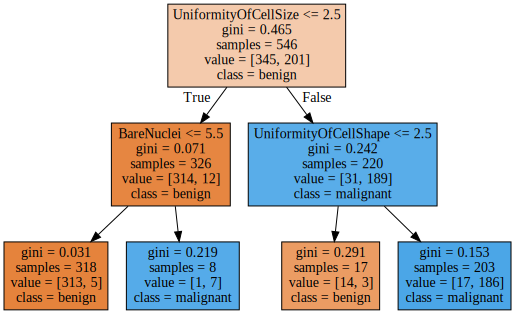

In [10]:
# Graph with criterion="gini" and max_depth = 2
import graphviz
classifier_gini = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf = 2, min_samples_split = 5, max_depth = 2)
classifier_gini.fit(x_train, y_train)

dot_data = tree.export_graphviz(classifier_gini, 
                                feature_names=feature,  
                                class_names=['benign','malignant'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

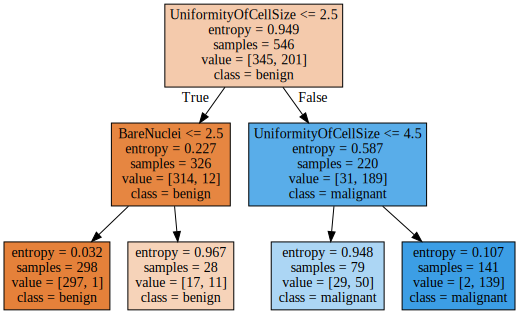

In [11]:
# Graph with criterion="entropy" and max_depth = 2
classifier_entropy = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 2, min_samples_split = 5, max_depth = 2)
classifier_entropy.fit(x_train, y_train)

dot_data = tree.export_graphviz(classifier_entropy, 
                                feature_names=feature,  
                                class_names=['benign','malignant'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [12]:
classifier_gini = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf = 2, min_samples_split = 5, max_depth=1)
classifier_entropy = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 2, min_samples_split = 5, max_depth=1)
classifier_gini.fit(x_train, y_train)
classifier_entropy.fit(x_train, y_train)
pred_gini = classifier_gini.predict(x_test)
pred_entropy = classifier_entropy.predict(x_test)
print("Accuracy percent with gini criterion = {}".format(metrics.accuracy_score(y_test,pred_gini)*100))
print("Accuracy percent with entropy criterion = {}".format(metrics.accuracy_score(y_test,pred_entropy)*100))
print("Misclassification Error percent with gini criterion = {}".format(100 - metrics.accuracy_score(y_test,pred_gini)*100))
print("Misclassification Error percent with entropy criterion = {}".format(100 - metrics.accuracy_score(y_test,pred_entropy)*100))

Accuracy percent with gini criterion = 94.8905109489051
Accuracy percent with entropy criterion = 94.8905109489051
Misclassification Error percent with gini criterion = 5.109489051094897
Misclassification Error percent with entropy criterion = 5.109489051094897


In [13]:
cm = metrics.confusion_matrix(y_test, classifier_gini.predict(x_test))

In [14]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# calculate accuracy
print((TP+TN)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, classifier_gini.predict(x_test)))

0.948905109489051
0.948905109489051


We get same accuracy in both the case, mantually and using function.

In [15]:
# calculate Misclassification Error
print((FP+FN)/float(TP+TN+FP+FN))
print(1 - metrics.accuracy_score(y_test, classifier_gini.predict(x_test)))

0.051094890510948905
0.051094890510948954


We get same Misclassification Error in both the case, mantually and using function.

Conclusion:

- gini index at first split = 0.455
- entropy at first split = 0.934
- Misclassification Error at first split with gini criterion = 0.10948905109489052
- Misclassification Error at first split with entropy criterion = 0.10948905109489052

- Information gain 
                    = parent entropy - average entropy of the children 
                    = 0.954 - ((363/546)*0.33 + (183/546)*0.39)
                    = 0.5839
                    
- "Uniformity Of Cell Shape" feature is selected at first split.
- Decision boundary is <= 3.5
         

# Problem 3

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
bc_file3 = "wdbc.data"
column_names3 = ["Id","Diagnosis",
                 "radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
                 "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",
                 "radius_se","texture_se","perimeter_se","area_se","smoothness_se",
                 "compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se",
                 "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
                 "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

bc_df3 = pd.read_csv(bc_file3, names=column_names3)
bc_df3

,Id,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
bc_df3['Diagnosis'] = bc_df3["Diagnosis"].apply(lambda x: 1 if x == 'M' else 0)
bc_df3.drop(['Id'], axis=1, inplace=True)
bc_df3

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
# split the original data
feature3 = list(bc_df3.columns[1:])
x3 = bc_df3[feature3]
y3 = bc_df3['Diagnosis']
x3_train, x3_test, y3_train, y3_test = model_selection.train_test_split(x3,
                                                                        y3,
                                                                        train_size=0.8,
                                                                        test_size=0.2)

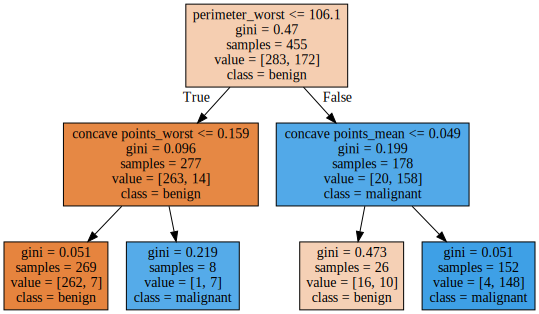

In [20]:
# plot a graph of the original data with criterion="gini" and max_depth = 2
clf_gini = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf = 2, min_samples_split = 5, max_depth = 2)
clf_gini.fit(x3_train, y3_train)

dot_data = tree.export_graphviz(clf_gini, feature_names=feature3,  
                                class_names=['benign','malignant'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [21]:
e = y3_test
p = clf_gini.predict(x3_test)

In [22]:
# Precision, Recall and F1 Score for the original data
print("Precision, Recall and F1 Score with macro = {}".format(metrics.precision_recall_fscore_support(e,p,average='macro')))
print("Precision, Recall and F1 Score with micro = {}".format(metrics.precision_recall_fscore_support(e,p,average='micro')))
print("Precision, Recall and F1 Score with weighted = {}".format(metrics.precision_recall_fscore_support(e,p,average='weighted')))

Precision, Recall and F1 Score with macro = (0.9037162162162162, 0.9037162162162162, 0.9037162162162162, None)
Precision, Recall and F1 Score with micro = (0.9122807017543859, 0.9122807017543859, 0.9122807017543859, None)
Precision, Recall and F1 Score with weighted = (0.9122807017543859, 0.9122807017543859, 0.9122807017543859, None)


In [23]:
cm = metrics.confusion_matrix(e,p)
cm

array([[69,  5],
       [ 5, 35]], dtype=int64)

In [24]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print("TP = {}".format(TP))
print("FP = {}".format(FP))
print("FN = {}".format(FN))
print("TN = {}".format(TN))
print("TPR = {}".format(TP/float(TP+FP)))
print("FPR = {}".format(FP/float(TN+FP)))

TP = 69
FP = 5
FN = 5
TN = 35
TPR = 0.9324324324324325
FPR = 0.125


In [25]:
# Scale the data
scaler = StandardScaler()
scaler.fit(bc_df3.values)
scaled_data = scaler.transform(bc_df3.values)

In [26]:
# Apply PCA for n_components=1 
pca_1 = PCA(n_components=1)
pca_1.fit(scaled_data)
pca_1_transformed = pca_1.transform(scaled_data)

In [27]:
pcadf_1 = pd.DataFrame(pca_1_transformed, columns = ['PC1'])
pcadf_1

,PC1
0,9.225770
1,2.655802
2,5.892492
3,7.135401
4,4.129423
...,...
564,6.593983
565,4.024833
566,1.530077
567,10.405008


In [28]:
feature3 = list(pcadf_1.columns)
x3 = pcadf_1[feature3]
y3 = bc_df3['Diagnosis']
x3_train, x3_test, y3_train, y3_test = model_selection.train_test_split(x3,
                                                                        y3,
                                                                        test_size=0.2)

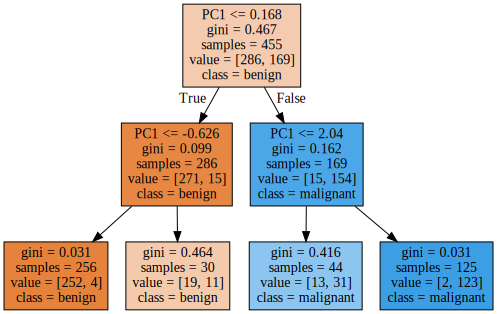

In [29]:
clf_gini = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf = 2, min_samples_split = 5, max_depth = 2)
clf_gini.fit(x3_train, y3_train)

dot_data = tree.export_graphviz(clf_gini, feature_names=feature3,  
                                class_names=['benign','malignant'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [30]:
e = y3_test
p = clf_gini.predict(x3_test)

In [31]:
print("Precision, Recall and F1 Score with macro = {}".format(metrics.precision_recall_fscore_support(e,p,average='macro')))
print("Precision, Recall and F1 Score with micro = {}".format(metrics.precision_recall_fscore_support(e,p,average='micro')))
print("Precision, Recall and F1 Score with weighted = {}".format(metrics.precision_recall_fscore_support(e,p,average='weighted')))

Precision, Recall and F1 Score with macro = (0.9146103896103897, 0.9182771044873894, 0.9163609684519443, None)
Precision, Recall and F1 Score with micro = (0.9210526315789473, 0.9210526315789473, 0.9210526315789473, None)
Precision, Recall and F1 Score with weighted = (0.9215481886534517, 0.9210526315789473, 0.9212263968799476, None)


In [32]:
cm = metrics.confusion_matrix(e,p)
cm

array([[66,  5],
       [ 4, 39]], dtype=int64)

In [33]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print("TP = {}".format(TP))
print("FP = {}".format(FP))
print("FN = {}".format(FN))
print("TN = {}".format(TN))
print("TPR = {}".format(TP/float(TP+FP)))
print("FPR = {}".format(FP/float(TN+FP)))

TP = 66
FP = 5
FN = 4
TN = 39
TPR = 0.9295774647887324
FPR = 0.11363636363636363


In [34]:
pca_2 = PCA(n_components=2)
pca_2.fit(scaled_data)
pca_2_transformed = pca_2.transform(scaled_data)

In [35]:
pcadf_2 = pd.DataFrame(pca_2_transformed, columns = ['PC1','PC2'])
pcadf_2

,PC1,PC2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579
...,...,...
564,6.593983,-3.454947
565,4.024833,-3.556006
566,1.530077,-1.958871
567,10.405008,1.849078


In [36]:
feature3 = list(pcadf_2.columns)
x3 = pcadf_2[feature3]
y3 = bc_df3['Diagnosis']
x3_train, x3_test, y3_train, y3_test = model_selection.train_test_split(x3,
                                                                        y3,
                                                                        train_size=0.8,
                                                                        test_size=0.2)

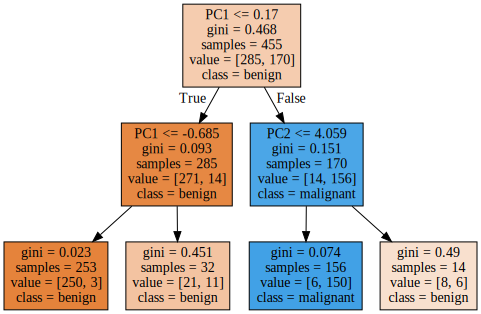

In [37]:
clf_gini = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf = 2, min_samples_split = 5, max_depth = 2)
clf_gini.fit(x3_train, y3_train)

dot_data = tree.export_graphviz(clf_gini, feature_names=feature3,  
                                class_names=['benign','malignant'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [38]:
e = y3_test
p = clf_gini.predict(x3_test)

In [39]:
print("Precision, Recall and F1 Score with macro = {}".format(metrics.precision_recall_fscore_support(e,p,average='macro')))
print("Precision, Recall and F1 Score with micro = {}".format(metrics.precision_recall_fscore_support(e,p,average='micro')))
print("Precision, Recall and F1 Score with weighted = {}".format(metrics.precision_recall_fscore_support(e,p,average='weighted')))

Precision, Recall and F1 Score with macro = (0.9144736842105263, 0.8958333333333334, 0.9037162162162162, None)
Precision, Recall and F1 Score with micro = (0.9122807017543859, 0.9122807017543859, 0.9122807017543859, None)
Precision, Recall and F1 Score with weighted = (0.9127423822714682, 0.9122807017543859, 0.9112731152204836, None)


In [40]:
cm = metrics.confusion_matrix(e,p)
cm

array([[69,  3],
       [ 7, 35]], dtype=int64)

In [41]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print("TP = {}".format(TP))
print("FP = {}".format(FP))
print("FN = {}".format(FN))
print("TN = {}".format(TN))
print("TPR = {}".format(TP/float(TP+FP)))
print("FPR = {}".format(FP/float(TN+FP)))

TP = 69
FP = 3
FN = 7
TN = 35
TPR = 0.9583333333333334
FPR = 0.07894736842105263


Conclusion :

For original data:

- Precision, Recall and F1 Score with macro = (0.9037162162162162, 0.9037162162162162, 0.9037162162162162, None)
- Precision, Recall and F1 Score with micro = (0.9122807017543859, 0.9122807017543859, 0.9122807017543859, None)
- Precision, Recall and F1 Score with weighted = (0.9122807017543859, 0.9122807017543859, 0.9122807017543859, None)

- TP = 68
- FP = 4
- FN = 2
- TN = 40
- TPR = 0.9444444444444444
- FPR = 0.09090909090909091

After applying PCA with n_component=1:

- Precision, Recall and F1 Score with macro = (0.9146103896103897, 0.9182771044873894, 0.9163609684519443, None)
- Precision, Recall and F1 Score with micro = (0.9210526315789473, 0.9210526315789473, 0.9210526315789473, None)
- Precision, Recall and F1 Score with weighted = (0.9215481886534517, 0.9210526315789473, 0.9212263968799476, None)

- TP = 63
- FP = 7
- FN = 6
- TN = 38
- TPR = 0.9
- FPR = 0.15555555555555556

After applying PCA with n_component=2:

- Precision, Recall and F1 Score with macro = (0.9144736842105263, 0.8958333333333334, 0.9037162162162162, None)
- Precision, Recall and F1 Score with micro = (0.9122807017543859, 0.9122807017543859, 0.9122807017543859, None)
- Precision, Recall and F1 Score with weighted = (0.9127423822714682, 0.9122807017543859, 0.9112731152204836, None)

- TP = 64
- FP = 8
- FN = 0
- TN = 42
- TPR = 0.8888888888888888
- FPR = 0.16

Decision trees work with continuous variables same as PCA works.

For example, consider age as the target variable. So, you compute the variance of age and it comes out to be x. Next, decision tree looks at various splits and calculates the total weighted variance of each of these splits. It chooses the split which provides the minimum variance (Greedy approach).

In our case, on 

# Problem 4

In [42]:
A = np.random.normal(5, 2, 50)
B = np.random.normal(-5, 2, 50)

In [43]:
C1 = np.repeat(0, 50)
C2 = np.repeat(1, 50)

In [44]:
dfA = pd.DataFrame(zip(A, C1), columns=["Feature", "Class"])
dfB = pd.DataFrame(zip(B, C2), columns=["Feature", "Class"])

In [45]:
dfC = pd.concat([dfA, dfB])
dfC

,Feature,Class
0,5.407340,0
1,8.273564,0
2,4.137242,0
3,6.304190,0
4,5.256433,0
...,...,...
45,-9.321989,1
46,-6.177042,1
47,-10.285160,1
48,-6.795898,1


In [46]:
feature4 = list(dfC.columns[:1])
# feature4 = list(df.iloc[:, 0])
x4 = dfC[feature4]
y4 = dfC['Class']
x4_train, x4_test, y4_train, y4_test = model_selection.train_test_split(x4,
                                                                        y4,
                                                                        train_size=0.8,
                                                                        test_size=0.2)

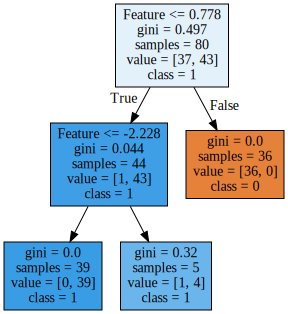

In [47]:
clfgini = tree.DecisionTreeClassifier(criterion="gini", max_depth = 2)
clfgini.fit(x4_train, y4_train)

dot_data = tree.export_graphviz(clfgini, feature_names=feature4,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph